In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

In [7]:
single_image.shape

(28, 28)

In [8]:
single_image.max()

255

In [9]:
single_image.min()

0

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
y_train.shape

(60000,)

In [14]:
y_test.shape

(10000,)

In [15]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [16]:
y_train.shape

(60000,)

In [17]:
y_test.shape

(10000,)

In [18]:
x_train = x_train/255
y_train = y_train/255

In [19]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [20]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [21]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
y_train[0]

0.0196078431372549

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2, monitor='val_loss')

In [50]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 395us/sample - loss: 0.0203 - accuracy: 0.9934 - val_loss: 68.8022 - val_accuracy: 0.9295
Epoch 2/10
60000/60000 [==============================] - 24s 404us/sample - loss: 0.0128 - accuracy: 0.9957 - val_loss: 62.3642 - val_accuracy: 0.9402
Epoch 3/10
60000/60000 [==============================] - 26s 425us/sample - loss: 0.0106 - accuracy: 0.9968 - val_loss: 29.4070 - val_accuracy: 0.9716
Epoch 4/10
60000/60000 [==============================] - 26s 438us/sample - loss: 0.0082 - accuracy: 0.9975 - val_loss: 33.3541 - val_accuracy: 0.9724
Epoch 5/10
60000/60000 [==============================] - 27s 453us/sample - loss: 0.0073 - accuracy: 0.9975 - val_loss: 31.0910 - val_accuracy: 0.9756


In [62]:
report = pd.DataFrame(model.history.history)

In [63]:
report.head()

,loss,accuracy,val_loss,val_accuracy
0,0.020311,0.993433,68.802248,0.9295
1,0.012835,0.995733,62.364218,0.9402
2,0.010600,0.996783,29.406982,0.9716
3,0.008232,0.997467,33.354063,0.9724
4,0.007290,0.997533,31.091040,0.9756


In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
predictions = model.predict_classes(x_test)

In [66]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.97      0.98      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.87      1.00      0.93       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [68]:
print(confusion_matrix(y_test, predictions))

[[ 976    0    0    0    0    0    3    0    1    0]
 [   1 1104    1    2    0    0    2    0   25    0]
 [   2    2  999    0    1    0    1    4   23    0]
 [   0    0    2  996    0    2    0    1    9    0]
 [   0    0    1    0  965    0    1    0   12    3]
 [   4    0    0   10    0  853    6    0   18    1]
 [   6    1    0    0    1    0  945    0    5    0]
 [   1    1    9    1    1    0    0  988   23    4]
 [   3    0    0    0    0    0    0    1  970    0]
 [   5    0    1    0   10    4    0    2   27  960]]


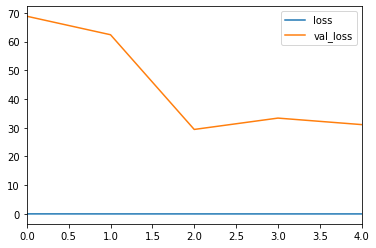

In [69]:
report[['loss', 'val_loss']].plot()

In [49]:
model.metrics_names

['loss', 'accuracy']

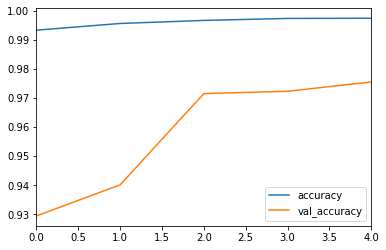

In [72]:
report[['accuracy', 'val_accuracy']].plot()

In [75]:
y_test[0]

7

In [77]:
x_test.shape

(10000, 28, 28, 1)

In [79]:
x_test[0].shape

(28, 28, 1)

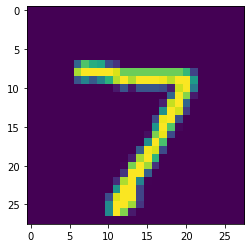

In [81]:
plt.imshow(x_test[0].reshape(28, 28))

In [84]:
model.predict_classes(x_test[0].reshape(1, 28, 28, 1))

array([7])

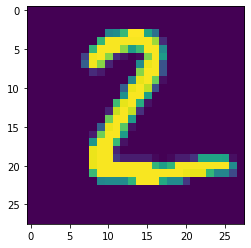

In [85]:
plt.imshow(x_test[1].reshape(28, 28))

In [88]:
model.predict_classes(x_test[1].reshape(1, 28, 28, 1))

array([2])

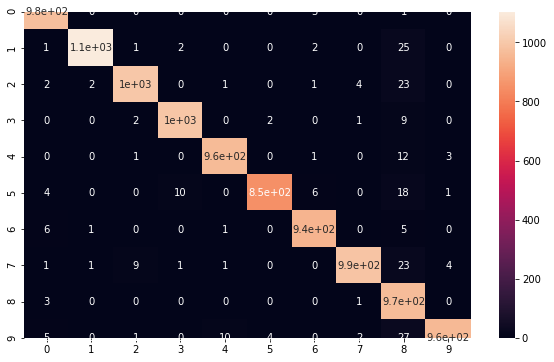

In [92]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)